<div class="alert alert-block alert-info">

<h1 style="font-family:verdana;"> DIABETES PREDICTION</h1> 

    
<ul>
<li><p style="font-family:verdana;">
In this we are going to predict whether a person is suffering from Diabetes or not, based on features in the dataset.
</p></li>
    
<li><p style="font-family:verdana;">
The datasets consists of different features and one target variable i.e (Outcome).
</p></li> 
  
</ul>

</div>



**Variables**
- Pregnancies: Number of pregnancies

- Glucose: Glucose.

- BloodPressure: Blood pressure.

- SkinThickness: Skin Thickness

- Insulin: Insulin.

- BMI: Body mass index.

- DiabetesPedigreeFunction: A function that calculates our probability of having diabetes based on our ancestry.

- Age: Age (years)

- Outcome: Information whether the person has diabetes or not. Have the disease (1) or not (0)

In [1]:
# Importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

## Reading The Dataset

In [2]:

df = pd.read_csv('diabetes.csv')

In [3]:
df.head(-5)
### Showing first and last five records

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
760,2,88,58,26,16,28.4,0.766,22,0
761,9,170,74,31,0,44.0,0.403,43,1


## Checking for total no.of columns and rows

In [4]:
df.shape

(768, 9)

## Info About the Datset 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Statistical summary

In [6]:
# Statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Checking For Zero Values in Column

In [7]:
(df==0).sum(axis=0)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [8]:
df.loc[df['BMI'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
145,0,102,75,23,0,0.0,0.572,21,0
371,0,118,64,23,89,0.0,1.731,21,0
426,0,94,0,0,0,0.0,0.256,25,0
494,3,80,0,0,0,0.0,0.174,22,0
522,6,114,0,0,0,0.0,0.189,26,0
684,5,136,82,0,0,0.0,0.640,69,0


In [9]:
df.loc[df['Glucose'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [10]:
df.loc[df['Insulin'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
764,2,122,70,27,0,36.8,0.340,27,0
766,1,126,60,0,0,30.1,0.349,47,1


In [11]:
df.loc[df['BloodPressure'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1
81,2,74,0,0,0,0.0,0.102,22,0
172,2,87,0,23,0,28.9,0.773,25,0
193,11,135,0,0,0,52.3,0.578,40,1
222,7,119,0,0,0,25.2,0.209,37,0
261,3,141,0,0,0,30.0,0.761,27,1


In [12]:
df.loc[df['SkinThickness'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
9,8,125,96,0,0,0.0,0.232,54,1
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
757,0,123,72,0,0,36.3,0.258,52,1
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
762,9,89,62,0,0,22.5,0.142,33,0



Some features like Glucose, Blood pressure , Insulin, BMI,Skin Thickness have zero values which represent missing data. 

<div class="alert alert-block alert-info">

<h3 style="font-family:verdana;"> Observations:</h3>

<ul>
    
<li><p style="font-family:verdana;">
There are a total of 768 records and 9 features in the dataset.
</p></li> 
    


<li><p style="font-family:verdana;">
In the outcome column, 1 represents diabetes positive and 0 represents diabetes negative.
</p></li>    

</ul>

</div>

# DATA PREPROCESSING

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Glucose'>

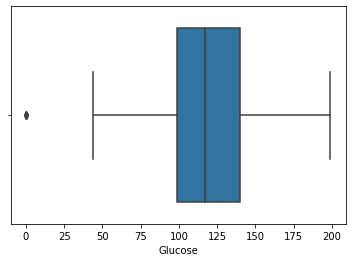

In [13]:
# Box plot
#
sns.boxplot(df.Glucose)



C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Glucose', ylabel='Density'>

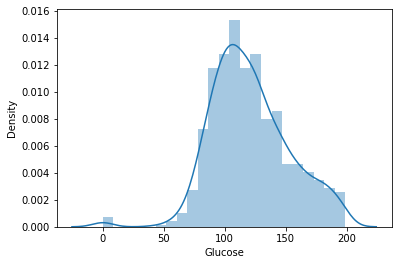

In [14]:
# Distribution plot
#
sns.distplot(df.Glucose)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='BloodPressure'>

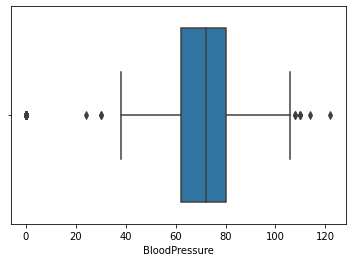

In [15]:
sns.boxplot(df.BloodPressure)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BloodPressure', ylabel='Density'>

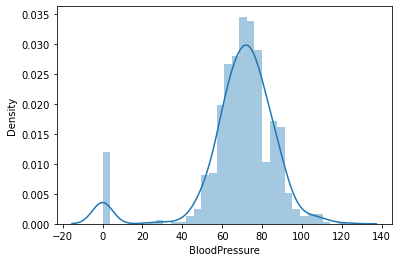

In [16]:
sns.distplot(df.BloodPressure)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='SkinThickness'>

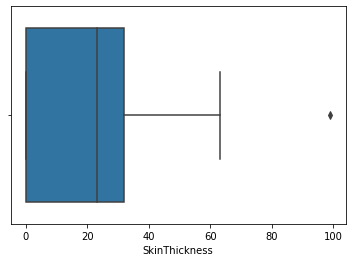

In [17]:
sns.boxplot(df.SkinThickness)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SkinThickness', ylabel='Density'>

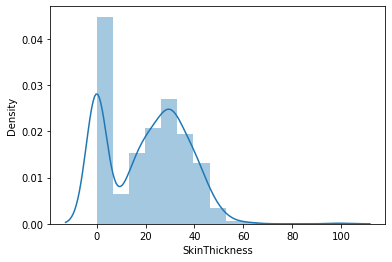

In [18]:
sns.distplot(df.SkinThickness)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Insulin'>

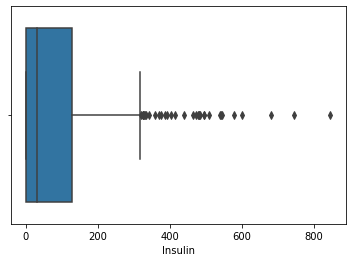

In [19]:
sns.boxplot(df.Insulin)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Insulin', ylabel='Density'>

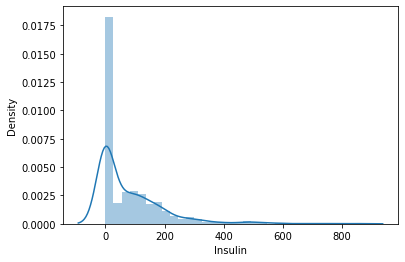

In [20]:
sns.distplot(df.Insulin)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='BMI'>

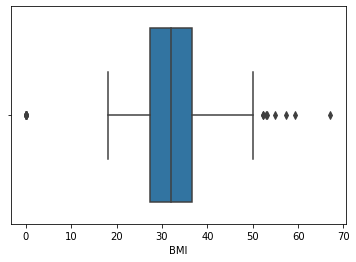

In [21]:
sns.boxplot(df.BMI)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BMI', ylabel='Density'>

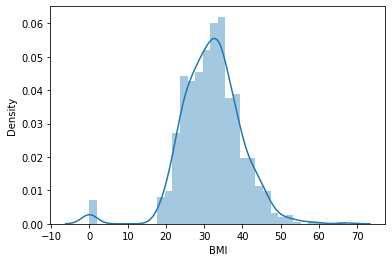

In [22]:
sns.distplot(df.BMI)

## Replacing the 0 values of dataset with Nan 

In [23]:
df[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]] = df[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].replace(0, np.NaN)

### Checking For Null Values

In [24]:
#checking again the null values
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

## Replacting the Nan values with mean and median

In [25]:
# Replacing NaN with mean values
df["Glucose"].fillna(df["Glucose"].mean(), inplace = True)
df["BloodPressure"].fillna(df["BloodPressure"].mean(), inplace = True)
df["SkinThickness"].fillna(df["SkinThickness"].median(), inplace = True)
df["Insulin"].fillna(df["Insulin"].median(), inplace = True)
df["BMI"].fillna(df["BMI"].mean(), inplace = True)

In [26]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# DATA VISUALIZATION

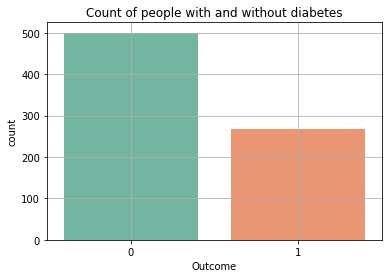

In [27]:
sns.countplot(x='Outcome',data=df, palette='Set2')
plt.title('Count of people with and without diabetes')
plt.grid()

In [28]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

## Ages

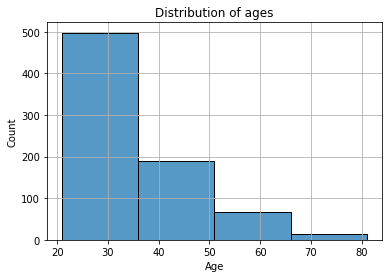

In [29]:
# Range of Ages
sns.histplot(df['Age'], bins=4)
plt.title('Distribution of ages')
plt.grid()

## Pregnancies

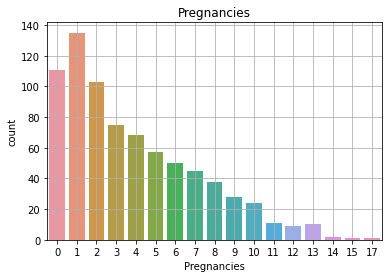

In [30]:
# Pregnancy count per woman
sns.countplot(x='Pregnancies', data=df)
plt.title('Pregnancies')
plt.grid()

## Glucose

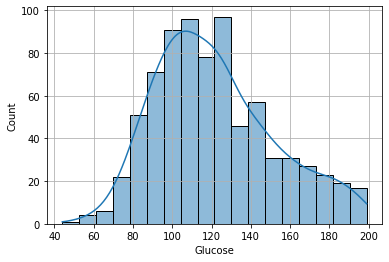

In [31]:
sns.histplot(df['Glucose'], kde=True)
plt.grid()

## blood pressure

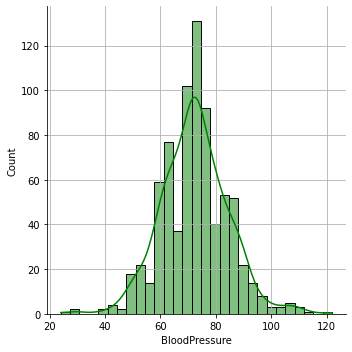

In [32]:
sns.displot(df['BloodPressure'],kde=True, color='green')
plt.grid()

## Body Mass Index (BMI)

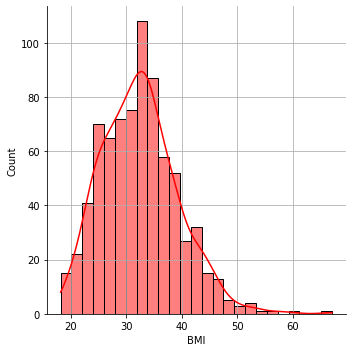

In [33]:
sns.displot(df['BMI'], kde=True, color='red')
plt.grid()

## SkinThickness

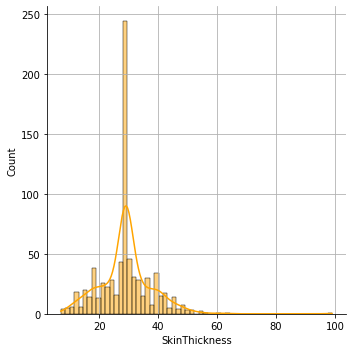

In [34]:
sns.displot(df['SkinThickness'], kde=True, color='orange')
plt.grid()

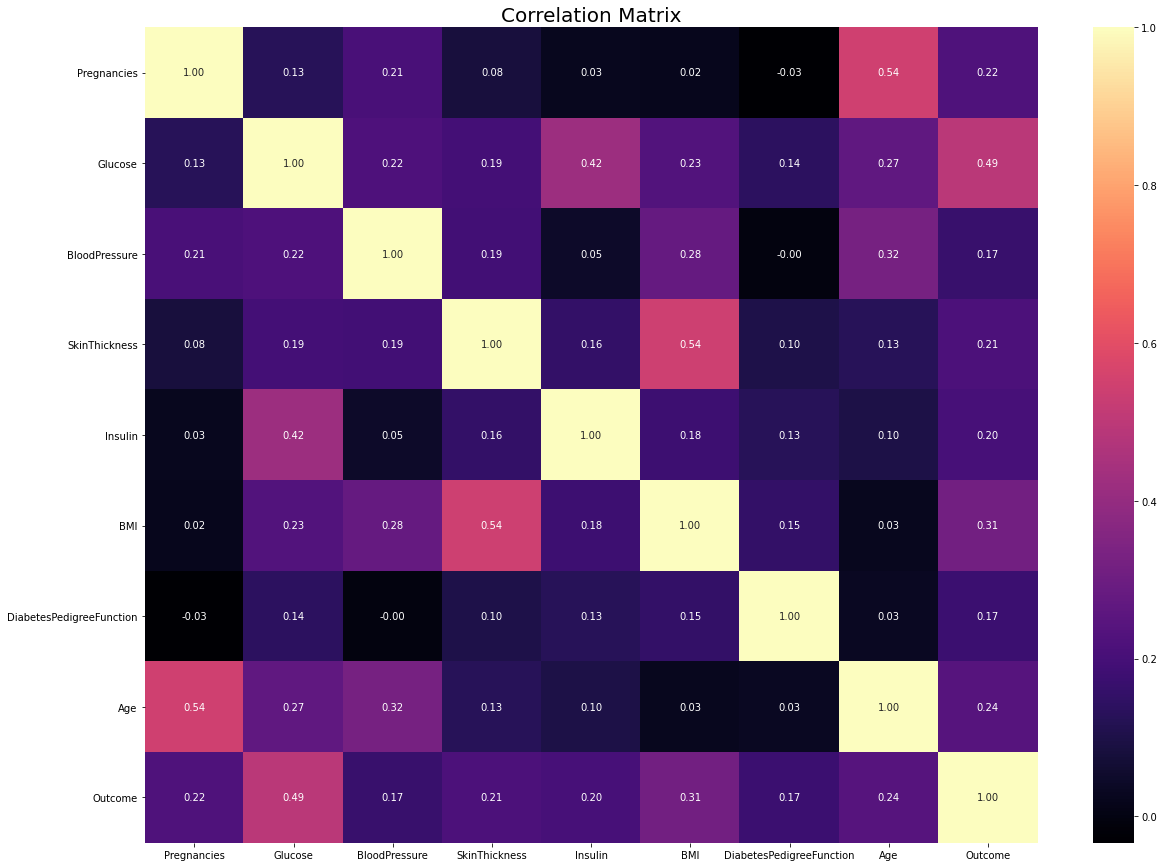

In [35]:
# Correlation Matrix
f, ax = plt.subplots(figsize=[20, 15])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

# Feature Scaling

In [36]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
df_scaled = sc.fit_transform(df)

**Here i used MinMaxScaler because it rescales the data such that all feature value are in range [0,1].**

In [37]:
df_scaled = pd.DataFrame(df_scaled)

In [38]:
df_scaled.head()

,0,1,2,3,4,5,6,7,8
0,0.352941,0.670968,0.489796,0.304348,0.133413,0.314928,0.234415,0.483333,1.0
1,0.058824,0.264516,0.428571,0.239130,0.133413,0.171779,0.116567,0.166667,0.0
2,0.470588,0.896774,0.408163,0.239130,0.133413,0.104294,0.253629,0.183333,1.0
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0.0
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1.0


## Selecting features

In [39]:

X = df_scaled.iloc[0: , 0:8].values
Y = df_scaled.iloc[:,-1].values

## Train Test Split

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42 )

In [41]:
# Checking dimensions
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (537, 8)
X_test shape: (231, 8)
Y_train shape: (537,)
Y_test shape: (231,)


## Fitting the Model

Now for fitting the model Iam using some of the algorithms like: Logistic Regression,SVC,K Nearrest Neighbours,Desicion Tree Classifier,Random Forest Classifier.

## Logistic regression

In [42]:

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state= 42)
log_reg.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
Y_pred_log_reg = log_reg.predict(X_test)

## K Nearest Neighbour

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


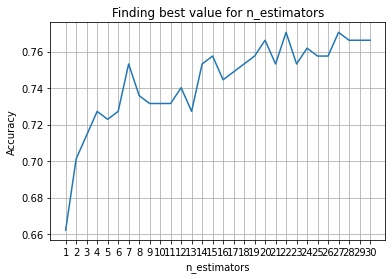

Highest value:  0.7705627705627706


In [44]:
# Plotting a graph for getting value of n_neighbors 
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

X_axis = list(range(1, 31))
acc = pd.Series()
x = range(1,31)

for i in list(range(1, 31)):
    knn_model = KNeighborsClassifier(n_neighbors = i) 
    knn_model.fit(X_train, Y_train)
    prediction = knn_model.predict(X_test)
    acc = acc.append(pd.Series(metrics.accuracy_score(prediction, Y_test)))
plt.plot(X_axis, acc)
plt.xticks(x)
plt.title("Finding best value for n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.grid()
plt.show()
print('Highest value: ',acc.values.max())

In [45]:

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 4, metric = 'minkowski', p = 2)
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [46]:
Y_pred_knn = knn.predict(X_test)

## Support Vector Classifier

In [47]:

from sklearn.svm import SVC
svc = SVC(random_state=42)
svc.fit(X_train,Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [48]:
Y_pred_svc=svc.predict(X_test)

In [49]:
## Desicion Tree Classifier

In [50]:

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'entropy', random_state=42)
tree.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [51]:
Y_pred_tree = tree.predict(X_test)

## Random Forest Classifier

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


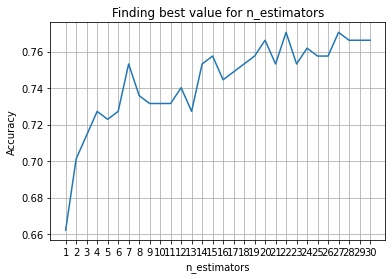

Highest value:  0.7705627705627706


In [52]:
# Plotting a graph for getting value of n_neighbors 
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

X_axis = list(range(1, 31))
acc = pd.Series()
x = range(1,31)

for i in list(range(1, 31)):
    random = KNeighborsClassifier(n_neighbors = i) 
    random.fit(X_train, Y_train)
    prediction = random.predict(X_test)
    acc = acc.append(pd.Series(metrics.accuracy_score(prediction, Y_test)))
plt.plot(X_axis, acc)
plt.xticks(x)
plt.title("Finding best value for n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.grid()
plt.show()
print('Highest value: ',acc.values.max())

In [53]:

from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(n_estimators = 4, criterion = 'entropy', random_state = 42)
random.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=4,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [54]:
Y_pred_random = random.predict(X_test)

# Model Evaluations

In [55]:
from sklearn.metrics  import accuracy_score

In [56]:
print('Logistic Regression:')
print('Accuracy score:', (accuracy_score(Y_test, Y_pred_log_reg) * 100))

Logistic Regression:
Accuracy score: 74.02597402597402


In [57]:
print('K Nearest Neighbour:')
print('Accuracy score:', (accuracy_score(Y_test, Y_pred_knn) * 100))

K Nearest Neighbour:
Accuracy score: 72.72727272727273


In [58]:
print('Support Vector Classifier:')
print('Accuracy score:', (accuracy_score(Y_test, Y_pred_svc) * 100))

Support Vector Classifier:
Accuracy score: 74.02597402597402


In [59]:
print('Desicion Tree Classifer:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_tree) * 100))

Desicion Tree Classifer:
Accuracy score: 71.0


In [60]:
print('Random Forest Classifer:')
print('Accuracy score:', (accuracy_score(Y_test, Y_pred_random) * 100))

Random Forest Classifer:
Accuracy score: 70.12987012987013


**From the above comparison,  I can observe that Logistic Regression  gets the highest accuracy of 74.02 %**. 

## Classification report

In [61]:

from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_log_reg))

              precision    recall  f1-score   support

         0.0       0.78      0.83      0.81       151
         1.0       0.64      0.56      0.60        80

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.70       231
weighted avg       0.73      0.74      0.74       231



In [62]:
# Creating a pickle file for the classifier
filename = 'DIABETES PREDICTION.pkl'
model = pickle.dump(log_reg, open(filename, 'wb'))